# Exercise

1. Spam Data
    - a. Load the spam data set.
    - b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    - c. Is there any overlap in the bigrams for the spam data and the ham data?
    - d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

<br>

2. Explore the blog articles using the techniques discussed in the exploration lesson.

<br>

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import unicodedata
import re
import seaborn as sns
import acquire
from wordcloud import WordCloud

In [5]:
def clean(text):
    '''
    This function is a simplified text cleaning function
    '''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

<hr style="border:2px solid black"> </hr>

### #1. Spam Data

#### #1a. Load the spam data set

In [6]:
#read in the csv
df = pd.read_csv('./spam_clean.csv')

#look at shape
print(df.shape)

#look at data
df.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#real texts
ham_words = clean(' '.join(df[df.label == 'ham'].text))

#spam messages
spam_words = clean(' '.join(df[df.label == 'spam'].text))

#all messages
all_words = clean(' '.join(df.text))

In [8]:
#create a series with words split and value counts for each word
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [14]:
#combine all frequency into single Series
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)

#word count for each text type
word_counts.columns = ['ham', 'spam', 'all']

#take a look
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


#### #1b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?  

In [10]:
#put list of two word combos together
list(nltk.bigrams(ham_words.split()))

[('go', 'until'),
 ('until', 'jurong'),
 ('jurong', 'point'),
 ('point', 'crazy'),
 ('crazy', 'available'),
 ('available', 'only'),
 ('only', 'in'),
 ('in', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e'),
 ('e', 'buffet'),
 ('buffet', 'cine'),
 ('cine', 'there'),
 ('there', 'got'),
 ('got', 'amore'),
 ('amore', 'wat'),
 ('wat', 'ok'),
 ('ok', 'lar'),
 ('lar', 'joking'),
 ('joking', 'wif'),
 ('wif', 'u'),
 ('u', 'oni'),
 ('oni', 'u'),
 ('u', 'dun'),
 ('dun', 'say'),
 ('say', 'so'),
 ('so', 'early'),
 ('early', 'hor'),
 ('hor', 'u'),
 ('u', 'c'),
 ('c', 'already'),
 ('already', 'then'),
 ('then', 'say'),
 ('say', 'nah'),
 ('nah', 'i'),
 ('i', 'dont'),
 ('dont', 'think'),
 ('think', 'he'),
 ('he', 'goes'),
 ('goes', 'to'),
 ('to', 'usf'),
 ('usf', 'he'),
 ('he', 'lives'),
 ('lives', 'around'),
 ('around', 'here'),
 ('here', 'though'),
 ('though', 'even'),
 ('even', 'my'),
 ('my', 'brother'),
 ('brother', 'is'),
 ('is', 'not'),
 ('not', 'lik

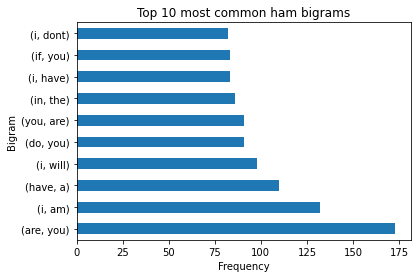

In [12]:
#visualize top ten
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
None

In [33]:
bigrams = pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10)
bigrams

(are, you)    173
(i, am)       132
(have, a)     110
(i, will)      98
(do, you)      91
(you, are)     91
(in, the)      86
(i, have)      83
(if, you)      83
(i, dont)      82
dtype: int64

(-0.5, 799.5, 599.5, -0.5)

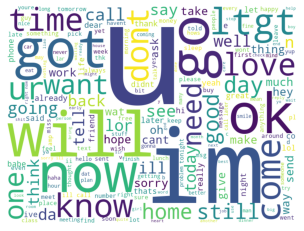

In [28]:
img = WordCloud(background_color='white', width=800, height=600).generate(ham_words)
plt.imshow(img)
plt.axis('off')

#### #1c. Is there any overlap in the bigrams for the spam data and the ham data?

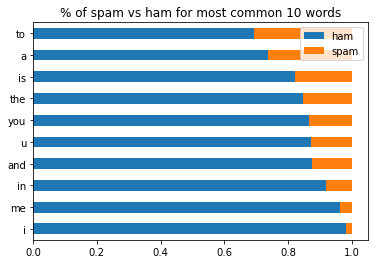

In [15]:
#visualize only ham and spam as percent of 'all'
(word_counts.sort_values(by='all', ascending=False)
 .head(10)
 .apply(lambda row: row/ row['all'],axis=1)
 .drop(columns='all')
 .sort_values(by='spam')
 .plot.barh(stacked=True))
plt.title('% of spam vs ham for most common 10 words')
None

#### #1d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [16]:
#put list of two word combos together
list(nltk.trigrams(ham_words.split()))

[('go', 'until', 'jurong'),
 ('until', 'jurong', 'point'),
 ('jurong', 'point', 'crazy'),
 ('point', 'crazy', 'available'),
 ('crazy', 'available', 'only'),
 ('available', 'only', 'in'),
 ('only', 'in', 'bugis'),
 ('in', 'bugis', 'n'),
 ('bugis', 'n', 'great'),
 ('n', 'great', 'world'),
 ('great', 'world', 'la'),
 ('world', 'la', 'e'),
 ('la', 'e', 'buffet'),
 ('e', 'buffet', 'cine'),
 ('buffet', 'cine', 'there'),
 ('cine', 'there', 'got'),
 ('there', 'got', 'amore'),
 ('got', 'amore', 'wat'),
 ('amore', 'wat', 'ok'),
 ('wat', 'ok', 'lar'),
 ('ok', 'lar', 'joking'),
 ('lar', 'joking', 'wif'),
 ('joking', 'wif', 'u'),
 ('wif', 'u', 'oni'),
 ('u', 'oni', 'u'),
 ('oni', 'u', 'dun'),
 ('u', 'dun', 'say'),
 ('dun', 'say', 'so'),
 ('say', 'so', 'early'),
 ('so', 'early', 'hor'),
 ('early', 'hor', 'u'),
 ('hor', 'u', 'c'),
 ('u', 'c', 'already'),
 ('c', 'already', 'then'),
 ('already', 'then', 'say'),
 ('then', 'say', 'nah'),
 ('say', 'nah', 'i'),
 ('nah', 'i', 'dont'),
 ('i', 'dont', 'think'

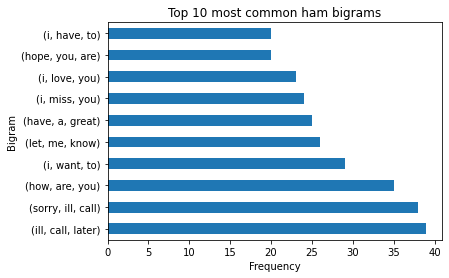

In [17]:
#visualize top ten
pd.Series(nltk.trigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')
None

<hr style="border:2px solid black"> </hr>

### #2. Explore the blog articles using the techniques discussed in the exploration lesson.

<hr style="border:2px solid black"> </hr>

### #3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.